In [ ]:
# Breast Cancer Clustering

### Key Points

**K-Means Clustering Implementation:** Implement K-Means clustering from scratch.

**Data Loading and Preprocessing:** Load the dataset and preprocess it.

**Clustering without Labels:** Perform clustering without using class labels and evaluate accuracy.

**Multiple Runs Analysis:** Analyze results with different initial centers.

**Supervised Method Comparison:** Compare results with a supervised method like Logistic Regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Data

Since dataset is missing columns arbitrary columns are added

In [ ]:
columns = ['id','f1','f2','f3','f4','f5','f6','f7','f8','f9','label']

In [ ]:
cancer_data = pd.read_csv('/data/breast-cancer-wisconsin.data', names = columns)

In [ ]:
cancer_data

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      699 non-null    int64 
 1   f1      699 non-null    int64 
 2   f2      699 non-null    int64 
 3   f3      699 non-null    int64 
 4   f4      699 non-null    int64 
 5   f5      699 non-null    int64 
 6   f6      699 non-null    object
 7   f7      699 non-null    int64 
 8   f8      699 non-null    int64 
 9   f9      699 non-null    int64 
 10  label   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Feature 6 has some null values so we drop the samples with null values as '?' and string values so we drop the null values and convert strings into integers

In [ ]:
cancer_data.drop(cancer_data.index[cancer_data['f6'] == '?'], inplace=True)
cancer_data['f6'] = cancer_data["f6"].astype(int)

In [ ]:
cancer_data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,label
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Checking for null values

In [ ]:
cancer_data.isnull().sum()

id       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
label    0
dtype: int64

# Removing labels from the dataset

In [ ]:
labels = cancer_data['label']

# Plotting Co-relation Matrix to identify irrelevant features

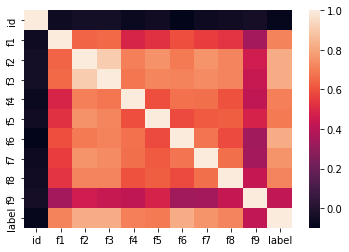

In [ ]:
import seaborn as sns

sns.heatmap(cancer_data.corr())

# Dropping id as it is irrelevant to our problem

In [ ]:
cancer_data = cancer_data.drop('label', axis = 1)
cancer_data = cancer_data.drop('id', axis = 1)

In [ ]:
cancer_data, labels

(     f1  f2  f3  f4  f5  f6  f7  f8  f9
 0     5   1   1   1   2   1   3   1   1
 1     5   4   4   5   7  10   3   2   1
 2     3   1   1   1   2   2   3   1   1
 3     6   8   8   1   3   4   3   7   1
 4     4   1   1   3   2   1   3   1   1
 ..   ..  ..  ..  ..  ..  ..  ..  ..  ..
 694   3   1   1   1   3   2   1   1   1
 695   2   1   1   1   2   1   1   1   1
 696   5  10  10   3   7   3   8  10   2
 697   4   8   6   4   3   4  10   6   1
 698   4   8   8   5   4   5  10   4   1
 
 [683 rows x 9 columns], 0      2
 1      2
 2      2
 3      2
 4      2
       ..
 694    2
 695    2
 696    4
 697    4
 698    4
 Name: label, Length: 683, dtype: int64)

# Writing Function for K *means*

In [ ]:
import random as rand
class KMeans():

    def __init__(self, k, iter):
        self.k = k
        self.iter = iter

    def initialize(self, data):    
        centroids = []

        for _ in range(self.k):
            centroid = data[rand.randint(0, len(data))]
            centroids.append(centroid)

        return centroids 

    def clustering(self, data, centroids):
        assigned_clusters = []

        for sample in data:
            cluster = []

            for centroid in centroids:

                closest_clust = np.linalg.norm(np.array(sample) - np.array(centroid))
                cluster.append(closest_clust)

            assigned_cluster = np.argmin(cluster)
            assigned_clusters.append(assigned_cluster)

        return assigned_clusters

    def update_centroids(self, data, centroids, assigned_clusters):
        centroids = []

        for i in range(self.k):
            cluster = []

            for j in range(len(data)):

                if (assigned_clusters[j] == i):
                    cluster.append(data[j])

            mean = list(np.mean(cluster, axis=0))
            centroids.append(mean)

        return centroids

    def assign_cluster(self, data, assigned_clusters):

        clusters = []
        for i in range(self.k):
            cluster = []

            for j in range(len(data)):

                if (assigned_clusters[j] == i):
                    cluster.append(data[j])

            clusters.append(cluster)

        return clusters

    def prediction(self, data, final_clusters):

        pred = []

        for sample in data:

            if sample in final_clusters[0]:
                pred.append(2)

            else:
                pred.append(4)

        return pred

    def score(self, pred, labels):

        correct = (labels == pred)
        score = correct.sum() / correct.size
        accuracy  = 'Accuracy is : ' + str((score)*100) + ' %'

        return accuracy

    def fit(self, data):

        data = data.values.tolist()
        centroids = self.initialize(data)
        print('Staring with Centroids :', centroids, '\n')


        for i in range(self.iter):

            print('------Iteration ', i+1 ,'---------')
            assigned_clusters = self.clustering(data, centroids)

            centroids = self.update_centroids(data, centroids, assigned_clusters)
            print('Centroids are :', centroids, "\n")

        final_clusters = self.assign_cluster(data, assigned_clusters)
        pred = self.prediction(data, final_clusters)

        return pred



# Testing Kmeans algorithm on 10 iterations
Note :- we take k = 2 as the dataset labels only have 2 classes

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer_data, labels, test_size=0.2, random_state=0)

In [ ]:
model = KMeans(k=2, iter=10)

In [ ]:
pred = model.fit(x_train)

Staring with Centroids : [[5, 1, 1, 1, 2, 1, 2, 1, 1], [10, 5, 7, 4, 4, 10, 8, 9, 1]] 

------Iteration  1 ---------
Centroids are : [[3.1105121293800537, 1.366576819407008, 1.4851752021563343, 1.398921832884097, 2.142857142857143, 1.3692722371967656, 2.161725067385445, 1.280323450134771, 1.0943396226415094], [7.228571428571429, 6.914285714285715, 6.845714285714286, 5.731428571428571, 5.508571428571429, 7.8914285714285715, 6.234285714285714, 6.422857142857143, 2.662857142857143]] 

------Iteration  2 ---------
Centroids are : [[3.0657534246575344, 1.3095890410958904, 1.4465753424657535, 1.3287671232876712, 2.073972602739726, 1.3287671232876712, 2.128767123287671, 1.2493150684931507, 1.093150684931507], [7.18232044198895, 6.845303867403315, 6.745856353591161, 5.7292817679558015, 5.535911602209945, 7.7569060773480665, 6.165745856353591, 6.314917127071824, 2.613259668508287]] 

------Iteration  3 ---------
Centroids are : [[3.041322314049587, 1.2947658402203857, 1.4352617079889807, 1.3305

# Finding accuracy of the Model using predicted values and labels

In [ ]:
model.score(pred, y_train)

'Accuracy is : 96.7032967032967 %'

# Testing the Model on different centers by using differnt seeds for random selection of centers

In [ ]:
rand.seed = 1
model1 = KMeans(k=2,iter=10)

rand.seed = 2
model2 = KMeans(k=2,iter=10)

rand.seed = 3
model3 = KMeans(k=2,iter=10)

In [ ]:
pred1 = model1.fit(x_train)
pred2 = model2.fit(x_train)
pred3 = model3.fit(x_train)

Staring with Centroids : [[1, 1, 1, 1, 2, 1, 3, 1, 1], [5, 7, 9, 8, 6, 10, 8, 10, 1]] 

------Iteration  1 ---------
Centroids are : [[3.1485411140583555, 1.3925729442970822, 1.5198938992042441, 1.3925729442970822, 2.1538461538461537, 1.493368700265252, 2.220159151193634, 1.312997347480106, 1.0981432360742707], [7.289940828402367, 7.053254437869822, 6.958579881656805, 5.899408284023669, 5.603550295857988, 7.846153846153846, 6.2485207100591715, 6.5325443786982245, 2.710059171597633]] 

------Iteration  2 ---------
Centroids are : [[3.0846994535519126, 1.3169398907103824, 1.4508196721311475, 1.3278688524590163, 2.0765027322404372, 1.3333333333333333, 2.139344262295082, 1.2595628415300546, 1.0956284153005464], [7.166666666666667, 6.861111111111111, 6.766666666666667, 5.7555555555555555, 5.55, 7.783333333333333, 6.166666666666667, 6.322222222222222, 2.6166666666666667]] 

------Iteration  3 ---------
Centroids are : [[3.041322314049587, 1.2947658402203857, 1.4352617079889807, 1.33057851239

In [ ]:
model1.score(pred1, y_train)

'Accuracy is : 96.7032967032967 %'

In [ ]:
model2.score(pred2, y_train)

'Accuracy is : 97.06959706959707 %'

In [ ]:
model3.score(pred3, y_train)

'Accuracy is : 97.06959706959707 %'

# Conclusion: 
Changing the starting centers does not affect the algorithm in any way since the accuracy is same for all 3 models. The model will converge to its ideal state regardless of the starting centroid

#Now we Check if using Supervised techniques gives different results or not

# Loading Logistic Regression and Knearest Neighbour Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = [LogisticRegression(random_state=0), KNeighborsClassifier()]

In [ ]:
for model in models:
    model.fit(x_train,y_train)
    print('Accuracy of model', model, 'is :', model.score(x_test, y_test))

Accuracy of model LogisticRegression(random_state=0) is : 0.9562043795620438
Accuracy of model KNeighborsClassifier() is : 0.9708029197080292


# Conclusion:
Supervised Models perform similiarly to unsupervised techniques for this problem